In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time

In [2]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
x=pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
x_test=pd.read_csv('/kaggle/input/titanic/test.csv',index_col='PassengerId')
display(x.head())
display(x_test.head())

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**sibsp=number of siblings or if have wife on ship parch=number of parents or children on the ship embarked=the port he got into the ship from (C = Cherbourg; Q = Queenstown; S = Southampton)**

# EDA

**after Reading documentations of seaborn library i found so much intersting plots that ight help me with visualizations and understanding the data more and getting insights**

In [3]:
display(x.describe().T)
display(x.info())

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

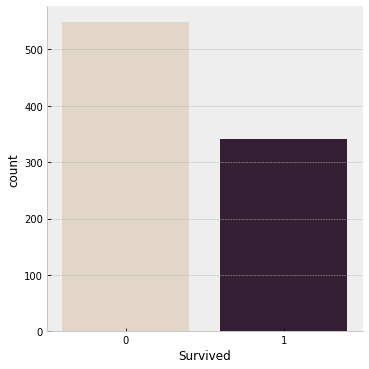

In [4]:
sns.catplot(x="Survived", kind="count", palette="ch:.25", data=x)

**from previous plot Survived People less than unsurvived**

**survival percent of passengers according to the class they belong to**

In [5]:
x[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**higher class means more survival persent,might be an indicator that percent of rich people is more than poor**

**percent of survival passenegers according to thier gender**

In [6]:
x[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


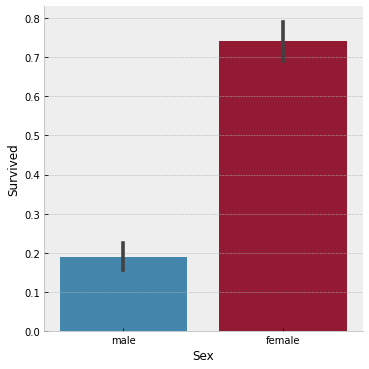

In [7]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=x)

**Female survival rate is much higher than that of male**

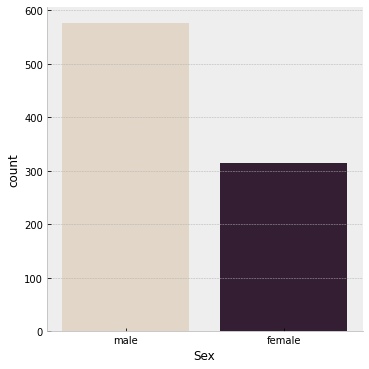

In [8]:
sns.catplot(x="Sex", kind="count", palette="ch:.25", data=x)

**number of females passengers on the ship is much more than that of males**

**i wanted to see the distribution of pclass of passengers according to gender as it might give me an insight or observation that leads to a powerfull feature**

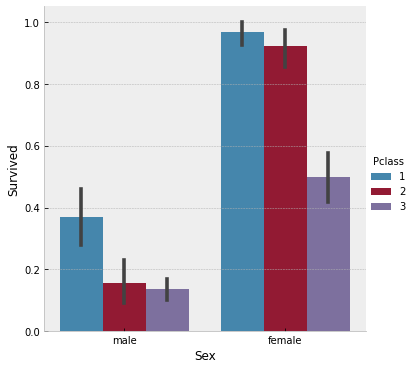

In [9]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=x)

**i found a strange and an intersting thing that males pclass 1 percent according to the other pclasses are higher than that of the females however from previouse plos higher pclass means more survival an females survival ate is much more than males**

**then i wnated to see what is the survival rate of males and females according to the port they joined he ship from**

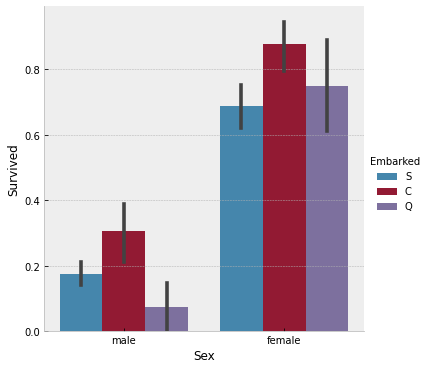

In [10]:
sns.catplot(x="Sex", y="Survived", hue="Embarked", kind="bar", data=x)

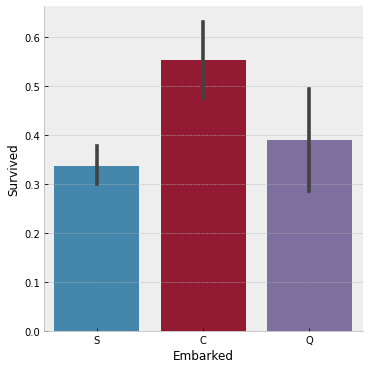

In [11]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=x)

**it is obviouse that most of the passengers survived are who joined the ship from Cherbourg Port**

**plotting survival rates of males and females according to number of siblings they have on the ship or if they are married**

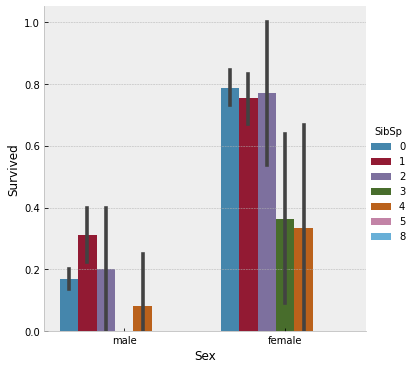

In [12]:
sns.catplot(x="Sex", y="Survived", hue="SibSp", kind="bar", data=x)

**most females have 0,1,2 siblings on the ship and survived while males most sirvived who had 1 sibling or had a wife on the ship**

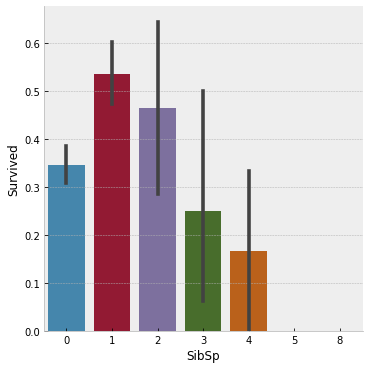

In [13]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=x)

**from previouse plot the rate of survived passengers wo had 1 sibling or married is higher than other passengers**

In [14]:
x[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


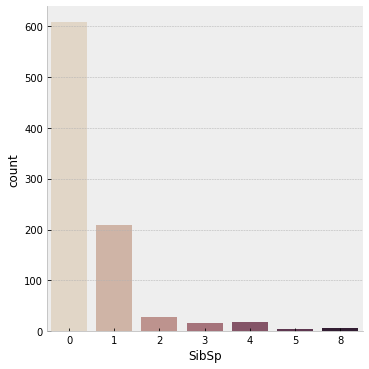

In [15]:
sns.catplot(x="SibSp", kind="count", palette="ch:.25", data=x)

**at the same time most passengers had 0 siblings on the ship or were single**

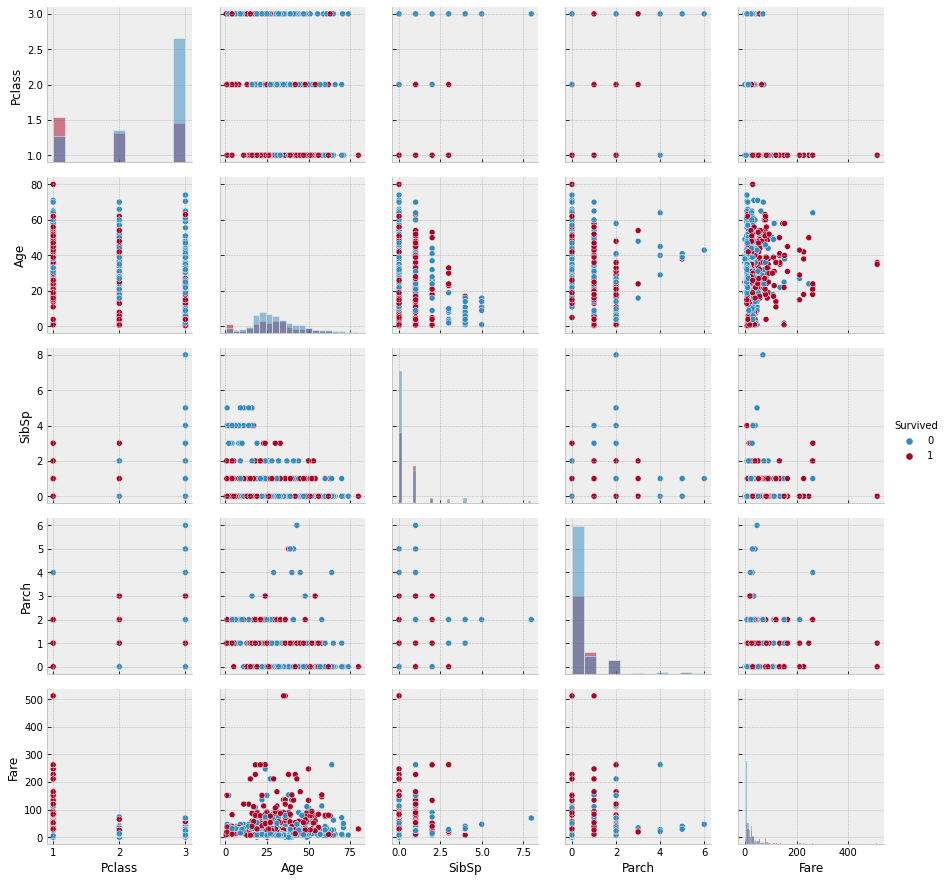

In [16]:
grid = sns.PairGrid(x, hue="Survived")
grid.map_offdiag(sns.scatterplot)
grid.map_diag(sns.histplot)
grid.add_legend()

<AxesSubplot:>

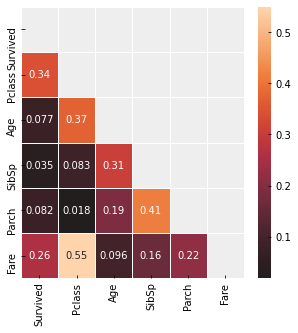

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
corr_matrix = x.corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, linewidths=.5, ax=ax,center=0)

**after potting the heat map of correlation i found that the pclass is the highest correlated feature to the survival label as i thought above after the plot of survival according to the pclass it might be due to thier economical status**

# PreProcessing and Feature Engineering

**i think the name column is a very valuable feature as i can get the nickname or the title of the passenger from it and see if there are more featues i can get from this column**

In [18]:
x['Title'] = x.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
x_test['Title'] = x_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
#each title mean age
x[["Title", "Age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Age').T

,8,9,10,11,14,12,2,13,5,3,4,15,6,7,16,1,0
Title,Master,Miss,Mlle,Mme,Ms,Mr,Countess,Mrs,Jonkheer,Don,Dr,Rev,Lady,Major,Sir,Col,Capt
Age,4.574167,21.773973,24.0,24.0,28.0,32.36809,33.0,35.898148,38.0,40.0,42.0,43.166667,48.0,48.5,49.0,58.0,70.0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


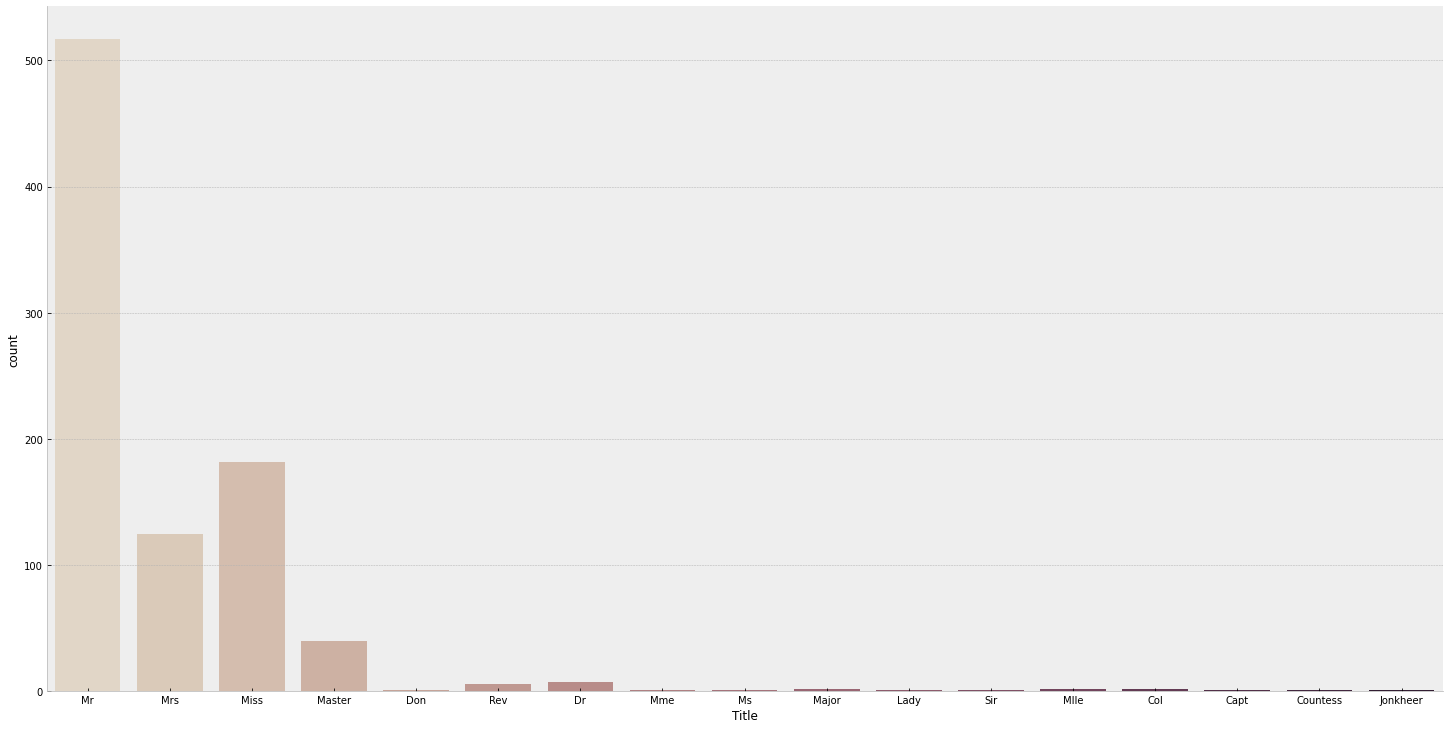

In [20]:
sns.catplot(x="Title", kind="count",height=10,aspect=2, palette="ch:.25",ax=ax, data=x)

**most of the passengers on the ship had the title of Mr which mean age is about 32 so most of the passengers were youth**

In [21]:
x[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,0.0,0.5,1.0,0.0,0.428571,0.0,1.0,0.5,0.575,0.697802,1.0,1.0,0.156673,0.792,1.0,0.0,1.0


**as stated fro the previouse analysis of the data most of the females titles survived and the new insight i got is that the captain of the ship didnt survive and half the kids on the ship survived**

# splitting labels from features and dropping the nae column after getting the new feature and got good insights from it

In [22]:
y=x.Survived
x=x.drop(['Survived','Name'],axis=1)
x_test=x_test.drop(['Name'],axis=1)

**Plotting Percent of missing values in columns**

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64
Cabin       77.104377
Age         19.865320
Embarked     0.224467
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Title        0.000000
dtype: float64


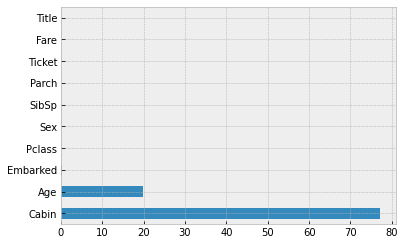

In [23]:
print(x.isnull().sum())
titanic_null_count=x.isnull().sum()*100/len(x)
miss_titanic_plot=titanic_null_count.sort_values(ascending=False).plot(kind='barh')
print(titanic_null_count.sort_values(ascending=False))

**Cabin column had 77% of its data missing so i decided to drop it**

In [24]:
x=x.drop(['Cabin'],axis=1)
x_test=x_test.drop(['Cabin'],axis=1)

# handling Object Datatypes Columns

In [25]:
obj_cols=x.select_dtypes('object').columns
obj_cols

Index(['Sex', 'Ticket', 'Embarked', 'Title'], dtype='object')

In [26]:
for col in obj_cols:
    print('{} column has {} unique values'.format(col,x[col].nunique()))

Sex column has 2 unique values
Ticket column has 681 unique values
Embarked column has 3 unique values
Title column has 17 unique values


**the Ticket Column had so much unique values so i decided to drop it to not increase complexity of model after encoding this column**

In [27]:
x=x.drop(['Ticket'],axis=1)
x_test=x_test.drop(['Ticket'],axis=1)

**encoding sex feature as it seems an important feature**

In [28]:
x['Sex'] = x.Sex.map({'male':0,'female':1})
x_test['Sex'] = x_test.Sex.map({'male':0,'female':1})

**label encoding title column**

In [29]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
x['Title'] = enc.fit_transform(x['Title'])
x_test['Title'] = enc.fit_transform(x_test['Title'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,12
2,1,1,38.0,1,0,71.2833,C,13
3,3,1,26.0,0,0,7.9250,S,9
4,1,1,35.0,1,0,53.1000,S,13
5,3,0,35.0,0,0,8.0500,S,12


# one hot encoding for Embarked Column

In [30]:
x.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title         int64
dtype: object

In [31]:
x=pd.get_dummies(x)
x_test=pd.get_dummies(x_test)

In [32]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0,22.0,1,0,7.2500,12,0,0,1
2,1,1,38.0,1,0,71.2833,13,1,0,0
3,3,1,26.0,0,0,7.9250,9,0,0,1
4,1,1,35.0,1,0,53.1000,13,0,0,1
5,3,0,35.0,0,0,8.0500,12,0,0,1


In [33]:
x[x.Age<1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
79,2,0,0.83,0,2,29.0000,8,0,0,1
306,1,0,0.92,1,2,151.5500,8,0,0,1
470,3,1,0.75,2,1,19.2583,9,1,0,0
645,3,1,0.75,2,1,19.2583,9,1,0,0
756,2,0,0.67,1,1,14.5000,8,0,0,1
804,3,0,0.42,0,1,8.5167,8,1,0,0
832,2,0,0.83,1,1,18.7500,8,0,0,1


In [34]:
x.isnull().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Title           0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

**See histogram of age to ceck for outliers and distribution of age**

<AxesSubplot:>

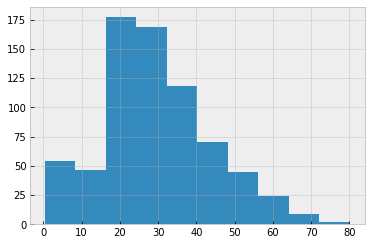

In [35]:
x['Age'].hist()

In [36]:
print(x.Age.mean())
print(x.Age.median())

29.69911764705882
28.0


In [37]:
imputer=SimpleImputer(strategy='median')
x_imputed = pd.DataFrame(imputer.fit_transform(x))
x_imputed.columns = x.columns
imputer=SimpleImputer(strategy='median')
x_test_imputed = pd.DataFrame(imputer.fit_transform(x_test))
x_test_imputed.columns = x_test.columns

**creating a new feature is FamilySize that indicate the size of the family of passenger on ship if he has and 0 if he is alone after that creating the feature is alone from it to indicat if the passenger has no siblings or children on the ship and he is single**

In [38]:
x_imputed['FamilySize'] = x_imputed['SibSp'] + x_imputed['Parch'] + 1
x_imputed['IsAlone'] = 0
x_imputed.loc[x_imputed['FamilySize'] == 1, 'IsAlone'] = 1

x_test_imputed['FamilySize'] = x_test_imputed['SibSp'] + x_test_imputed['Parch'] + 1
x_test_imputed['IsAlone'] = 0
x_test_imputed.loc[x_test_imputed['FamilySize'] == 1, 'IsAlone'] = 1


**Dropping redundant features**

In [39]:
x_imputed=x_imputed.drop(['SibSp','Parch'],axis=1)
x_test_imputed=x_test_imputed.drop(['SibSp','Parch'],axis=1)

In [40]:
x_imputed.head()

,Pclass,Sex,Age,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3.0,0.0,22.0,7.2500,12.0,0.0,0.0,1.0,2.0,0
1,1.0,1.0,38.0,71.2833,13.0,1.0,0.0,0.0,2.0,0
2,3.0,1.0,26.0,7.9250,9.0,0.0,0.0,1.0,1.0,1
3,1.0,1.0,35.0,53.1000,13.0,0.0,0.0,1.0,2.0,0
4,3.0,0.0,35.0,8.0500,12.0,0.0,0.0,1.0,1.0,1


# Standardization

In [41]:
scaler=StandardScaler()
x_imputed_cols=x_imputed.columns
x_test_imputed_cols=x_test_imputed.columns
x_imputed=pd.DataFrame(scaler.fit_transform(x_imputed.astype(float)),columns=x_imputed_cols)
x_imputed.index=x.index

x_test_imputed=pd.DataFrame(scaler.fit_transform(x_test_imputed.astype(float)),columns=x_test_imputed_cols)
x_test_imputed.index=x_test.index

In [42]:
x_imputed.head()

,Pclass,Sex,Age,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
PassengerId,,,,,,,,,,
1,0.827377,-0.737695,-0.565736,-0.502445,0.417887,-0.482043,-0.307562,0.619306,0.059160,-1.231645
2,-1.566107,1.355574,0.663861,0.786845,0.954397,2.074505,-0.307562,-1.614710,0.059160,-1.231645
3,0.827377,1.355574,-0.258337,-0.488854,-1.191641,-0.482043,-0.307562,0.619306,-0.560975,0.811922
4,-1.566107,1.355574,0.433312,0.420730,0.954397,-0.482043,-0.307562,0.619306,0.059160,-1.231645
5,0.827377,-0.737695,0.433312,-0.486337,0.417887,-0.482043,-0.307562,0.619306,-0.560975,0.811922


# Splitting Data into tran and validate with ratio 80:20

In [43]:
x_train,x_validate,y_train,y_validate=train_test_split(x_imputed,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)

# Trying different models using gridsearchCV and chosing the top one to tune its parameters

In [44]:
logreg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()
class_list=[logreg, dt,rf,svm]
for model in class_list:
        start = time.time()
        grid = GridSearchCV(estimator=model, param_grid={}, scoring='accuracy', cv=5, n_jobs=-1,verbose=3)
        grid.fit(x_train, y_train)
        end = time.time()
        print(model, '\n', grid.best_score_,'\n', round(end-start))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LogisticRegression() 
 0.7978233034571064 
 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DecisionTreeClassifier() 
 0.7543090712104796 
 0
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


RandomForestClassifier() 
 0.7937161430119176 
 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVC() 
 0.8216290751502019 
 0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


**SVM got the highes accuracy so i will try to tune its parameters**

In [45]:
param_grid = {'C': [0.01,0.5,1,2,5,7,9],
              'kernel': [ 'poly','sigmoid', 'linear','rbf'],
             'degree':[2,3,4],
             'gamma':['scale','auto']}
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

best = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1,verbose=3)
best.fit(x_train, y_train)

print(best.best_score_,best.best_estimator_,best.best_params_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


0.8272760581025659 SVC(C=1, degree=2) {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:    3.6s finished


In [46]:
# model=LogisticRegression(max_iter= 50, penalty= 'l2', solver= 'newton-cg')
# model.fit(x_train,y_train)
# prediction=model.predict(x_validate)
# print(accuracy_score(y_validate,prediction))

In [47]:
model=SVC(C=1, degree=2)
model.fit(x_train,y_train)
prediction=model.predict(x_validate)
print(accuracy_score(y_validate,prediction))

0.8268156424581006


In [48]:
# model=RandomForestClassifier()
# model.fit(x_train,y_train)
# prediction=model.predict(x_validate)
# print(accuracy_score(y_validate,prediction))

In [49]:
model=SVC()
model.fit(x_imputed,y)
prediction=model.predict(x_test_imputed)

In [50]:
submission = pd.DataFrame({
        "PassengerId": x_test_imputed.index,
        "Survived": prediction
    })
print(submission)
submission.to_csv('/kaggle/working/FinalSub.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
